In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from datetime import timedelta
plt.style.use('seaborn')
%matplotlib inline

# Analysis of Cycling Data

## Loading Data

The first dataset is an export of my ride data from [Strava](https://strava.com/), an online social 
network site for cycling and other sports.  This data is a log of every ride since the start of 2018
and contains summary data like the distance and average speed.  It was exported using 
the script `stravaget.py` which uses the stravalib module to read data. Some details of
the fields exported by that script can be seen in [the documentation for stravalib](https://pythonhosted.org/stravalib/api.html#stravalib.model.Activity). 

The exported data is a CSV file so that's easy to read, however the date information in the file is 
recorded in a different timezone (UTC) so we need to do a bit of conversion.  In reading the data I'm
setting the index of the data frame to be the datetime of the ride. 

If the below cell gives error in `tz_localize`, use `tz_convert` as Pandas is time zone aware. 

In [3]:
strava = pd.read_csv('data/strava_export.csv', index_col='date', parse_dates=True)
strava.index = strava.index.tz_convert('UTC')
strava.head()
strava

,average_heartrate,average_temp,average_watts,device_watts,distance,elapsed_time,elevation_gain,kudos,moving_time,workout_type
date,,,,,,,,,,
2018-01-02 20:47:51+00:00,100.6,21.0,73.8,False,15.2,94,316.00 m,10,73,Ride
2018-01-04 01:36:53+00:00,NaN,24.0,131.7,False,18.0,52,236.00 m,5,46,Ride
2018-01-04 02:56:00+00:00,83.1,25.0,13.8,False,0.0,3,0.00 m,2,2,Ride
2018-01-04 05:37:04+00:00,110.1,24.0,113.6,False,22.9,77,246.00 m,8,64,Ride
2018-01-05 19:22:46+00:00,110.9,20.0,147.7,True,58.4,189,676.00 m,12,144,Ride
...,...,...,...,...,...,...,...,...,...,...
2019-07-19 20:22:49+00:00,NaN,3.0,166.8,True,58.2,174,666.00 m,16,136,Ride
2019-07-26 20:12:56+00:00,120.8,7.0,166.9,True,59.6,185,663.00 m,15,139,Ride
2019-07-27 20:42:59+00:00,122.0,3.0,168.4,True,19.8,49,247.00 m,6,47,Ride


The second dataset comes from an application called [GoldenCheetah](https://www.goldencheetah.org/) which provides
some analytics services over ride data.  This has some of the same fields but adds a lot of analysis of the 
power, speed and heart rate data in each ride.  This data overlaps with the Strava data but doesn't include all 
of the same rides. 

Again we create an index using the datetime for each ride, this time combining two columns in the data (date and time) 
and localising to Sydney so that the times match those for the Strava data. 

In [4]:
cheetah = pd.read_csv('data/cheetah.csv', skipinitialspace=True)
cheetah.index = pd.to_datetime(cheetah['date'] + ' ' + cheetah['time'])
cheetah.index = cheetah.index.tz_localize('Australia/Sydney')
cheetah.head()
cheetah

,date,time,filename,axPower,aPower Relative Intensity,aBikeScore,Skiba aVI,aPower Response Index,aIsoPower,aIF,...,Rest AVNN,Rest SDNN,Rest rMSSD,Rest PNN50,Rest LF,Rest HF,HRV Recovery Points,NP,IF,TSS
2018-01-28 06:39:49+11:00,01/28/18,06:39:49,2018_01_28_06_39_49.json,202.211,0.754520,16.6520,1.31920,1.67755,223.621,0.834410,...,0,0,0,0,0,0,0,222.856,0.831550,20.2257
2018-01-28 07:01:32+11:00,01/28/18,07:01:32,2018_01_28_07_01_32.json,226.039,0.843430,80.2669,1.21137,1.54250,246.185,0.918600,...,0,0,0,0,0,0,0,245.365,0.915540,94.5787
2018-02-01 08:13:34+11:00,02/01/18,08:13:34,2018_02_01_08_13_34.json,0.000,0.000000,0.0000,0.00000,0.00000,0.000,0.000000,...,0,0,0,0,0,0,0,0.000,0.000000,0.0000
2018-02-06 08:06:42+11:00,02/06/18,08:06:42,2018_02_06_08_06_42.json,221.672,0.827140,78.8866,1.35775,1.86002,254.409,0.949290,...,0,0,0,0,0,0,0,253.702,0.946650,98.3269
2018-02-07 17:59:05+11:00,02/07/18,17:59:05,2018_02_07_17_59_05.json,218.211,0.814220,159.4590,1.47188,1.74658,233.780,0.872310,...,0,0,0,0,0,0,0,232.644,0.868080,171.0780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-07-20 06:22:49+10:00,07/20/19,06:22:49,2019_07_20_06_22_49.json,204.799,0.764175,140.7350,1.24317,0.00000,222.990,0.832052,...,0,0,0,0,0,0,0,222.988,0.832045,159.3630
2019-07-27 06:12:56+10:00,07/27/19,06:12:56,2019_07_27_06_12_56.json,209.935,0.783340,151.5300,1.28248,1.74567,236.254,0.881543,...,0,0,0,0,0,0,0,236.028,0.880701,183.1140
2019-07-28 06:42:59+10:00,07/28/19,06:42:59,2019_07_28_06_42_59.json,193.017,0.720214,42.8943,1.19066,1.58605,212.345,0.792332,...,0,0,0,0,0,0,0,212.020,0.791118,51.1646
2019-07-28 07:47:24+10:00,07/28/19,07:47:24,2019_07_28_07_47_24.json,251.993,0.940274,74.0446,1.07162,1.74483,268.022,1.000080,...,0,0,0,0,0,0,0,267.699,0.998877,83.5620


The GoldenCheetah data contains many many variables (columns) and we won't go into all of them here. Some
that are of particular interest for the analysis below are:

Here are definitions of some of the more important fields in the data. Capitalised fields come from the GoldenCheetah data
while lowercase_fields come from Strava. There are many cases where fields are duplicated and in this case the values
should be the same, although there is room for variation as the algorithm used to calculate them could be different
in each case. 

  * Duration - overall duration of the ride, should be same as elapsed_time
  * Time Moving - time spent moving (not resting or waiting at lights), should be the same as moving_time
  * Elevation Gain - metres climbed over the ride
  * Average Speed - over the ride
  * Average Power - average power in watts as measured by a power meter, relates to how much effort is being put in to the ride, should be the same as  * average_watts' from Strava
  * Nonzero Average Power - same as Average Power but excludes times when power is zero from the average
  * Average Heart Rate - should be the same as average_heartrate
  * Average Cadence - cadence is the rotations per minute of the pedals
  * Average Temp - temperature in the environment as measured by the bike computer (should be same as average_temp)
  * VAM - average ascent speed - speed up hills
  * Calories (HR) - Calorie expendature as estimated from heart rate data
  * 1 sec Peak Power - this and other  'Peak Power' measures give the maximum power output in the ride over this time period.  Will be higher for shorter periods. High values in short periods would come from a very 'punchy' ride with sprints for example.
  * 1 min Peak Hr - a similar measure relating to Heart Rate
  * NP - Normalised Power, a smoothed average power measurement, generally higher than Average Power 
  * TSS - Training Stress Score, a measure of how hard a ride this was
  * device_watts - True if the power (watts) measures were from a power meter, False if they were estimated
  * distance - distance travelled in Km
  * kudos - likes from other Strava users (social network)
  * workout_type - one of  'Race',  'Workout' or  'Ride'
  
  
Some of the GoldenCheetah parameters are defined [in thier documentation](https://github.com/GoldenCheetah/GoldenCheetah/wiki/UG_Glossary).  

## Your Tasks

Your first task is to combine these two data frames using the [`join` method of Pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html#joining-on-index).   The goal is to keep only those rows of data 
that appear in __both__ data frames so that we have complete data for every row.  

In [5]:
#Inner Join strava and cheetah
strava_cheetah = strava.join(cheetah, how="inner")
strava_cheetah

,average_heartrate,average_temp,average_watts,device_watts,distance,elapsed_time,elevation_gain,kudos,moving_time,workout_type,...,Rest AVNN,Rest SDNN,Rest rMSSD,Rest PNN50,Rest LF,Rest HF,HRV Recovery Points,NP,IF,TSS
2018-01-27 19:39:49+00:00,120.6,21.0,153.4,True,7.6,17,95.00 m,4,17,Ride,...,0,0,0,0,0,0,0,222.856,0.831550,20.2257
2018-01-27 20:01:32+00:00,146.9,22.0,187.7,True,38.6,67,449.00 m,19,67,Race,...,0,0,0,0,0,0,0,245.365,0.915540,94.5787
2018-01-31 21:13:34+00:00,109.8,19.0,143.0,False,26.3,649,612.00 m,6,113,Ride,...,0,0,0,0,0,0,0,0.000,0.000000,0.0000
2018-02-05 21:06:42+00:00,119.3,19.0,165.9,True,24.3,69,439.00 m,6,65,Ride,...,0,0,0,0,0,0,0,253.702,0.946650,98.3269
2018-02-07 06:59:05+00:00,124.8,20.0,151.0,True,47.1,144,890.00 m,10,134,Ride,...,0,0,0,0,0,0,0,232.644,0.868080,171.0780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-07-19 20:22:49+00:00,NaN,3.0,166.8,True,58.2,174,666.00 m,16,136,Ride,...,0,0,0,0,0,0,0,222.988,0.832045,159.3630
2019-07-26 20:12:56+00:00,120.8,7.0,166.9,True,59.6,185,663.00 m,15,139,Ride,...,0,0,0,0,0,0,0,236.028,0.880701,183.1140
2019-07-27 20:42:59+00:00,122.0,3.0,168.4,True,19.8,49,247.00 m,6,47,Ride,...,0,0,0,0,0,0,0,212.020,0.791118,51.1646
2019-07-27 21:47:24+00:00,144.4,3.0,235.2,True,29.1,50,415.00 m,15,50,Race,...,0,0,0,0,0,0,0,267.699,0.998877,83.5620


In [6]:
#1.Remove rides with no measured power (where device_watts is False) - these are commutes or MTB rides
strava_cheetah = strava_cheetah.drop(strava_cheetah.index[strava_cheetah.device_watts == False])

#strava_cheetah['Date'] = pd.to_datetime(strava_cheetah['date'])
strava_cheetah['Date'] = strava_cheetah.index
strava_cheetah['SC_Date'] =strava_cheetah['Date'].dt.date
#strava_cheetah['Year1']=strava_cheetah['Date'].dt.year
#strava_cheetah['Month1']=strava_cheetah['Date'].dt.month
#strava_cheetah['Day1']=strava_cheetah['Date'].dt.day

strava_cheetah
#strava_cheetah.dtypes

,average_heartrate,average_temp,average_watts,device_watts,distance,elapsed_time,elevation_gain,kudos,moving_time,workout_type,...,Rest rMSSD,Rest PNN50,Rest LF,Rest HF,HRV Recovery Points,NP,IF,TSS,Date,SC_Date
2018-01-27 19:39:49+00:00,120.6,21.0,153.4,True,7.6,17,95.00 m,4,17,Ride,...,0,0,0,0,0,222.856,0.831550,20.2257,2018-01-27 19:39:49+00:00,2018-01-27
2018-01-27 20:01:32+00:00,146.9,22.0,187.7,True,38.6,67,449.00 m,19,67,Race,...,0,0,0,0,0,245.365,0.915540,94.5787,2018-01-27 20:01:32+00:00,2018-01-27
2018-02-05 21:06:42+00:00,119.3,19.0,165.9,True,24.3,69,439.00 m,6,65,Ride,...,0,0,0,0,0,253.702,0.946650,98.3269,2018-02-05 21:06:42+00:00,2018-02-05
2018-02-07 06:59:05+00:00,124.8,20.0,151.0,True,47.1,144,890.00 m,10,134,Ride,...,0,0,0,0,0,232.644,0.868080,171.0780,2018-02-07 06:59:05+00:00,2018-02-07
2018-02-09 19:18:03+00:00,123.0,20.0,145.9,True,59.8,193,656.00 m,22,139,Ride,...,0,0,0,0,0,212.726,0.793750,147.7970,2018-02-09 19:18:03+00:00,2018-02-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-07-19 20:22:49+00:00,NaN,3.0,166.8,True,58.2,174,666.00 m,16,136,Ride,...,0,0,0,0,0,222.988,0.832045,159.3630,2019-07-19 20:22:49+00:00,2019-07-19
2019-07-26 20:12:56+00:00,120.8,7.0,166.9,True,59.6,185,663.00 m,15,139,Ride,...,0,0,0,0,0,236.028,0.880701,183.1140,2019-07-26 20:12:56+00:00,2019-07-26
2019-07-27 20:42:59+00:00,122.0,3.0,168.4,True,19.8,49,247.00 m,6,47,Ride,...,0,0,0,0,0,212.020,0.791118,51.1646,2019-07-27 20:42:59+00:00,2019-07-27
2019-07-27 21:47:24+00:00,144.4,3.0,235.2,True,29.1,50,415.00 m,15,50,Race,...,0,0,0,0,0,267.699,0.998877,83.5620,2019-07-27 21:47:24+00:00,2019-07-27


In [7]:
#Select some columns
cols = ['SC_Date','elapsed_time', 'Duration', 'moving_time', 'Time Moving', 'Elevation Gain', 'Average Speed',
         'average_watts', 'Average Power', 'Nonzero Average Power', 'NP', 'average_heartrate', 'Average Heart Rate',
         'Average Cadence','average_temp', 'Average Temp', 'VAM', 'Calories (HR)', '1 sec Peak Power', '1 min Peak Hr',
         'TSS', 'device_watts', 'distance', 'kudos', 'workout_type','elevation_gain']

result = strava_cheetah[cols]

#cheetah['new_date']=pd.to_datetime(cheetah['date'])
#cheetah['year']=cheetah['date'].dt.year
#cheetah['month']=cheetah['date'].dt.month
#cheetah['day']=cheetah['date'].dt.day
#cheetah_r.head()

result

,SC_Date,elapsed_time,Duration,moving_time,Time Moving,Elevation Gain,Average Speed,average_watts,Average Power,Nonzero Average Power,...,VAM,Calories (HR),1 sec Peak Power,1 min Peak Hr,TSS,device_watts,distance,kudos,workout_type,elevation_gain
2018-01-27 19:39:49+00:00,2018-01-27,17,1053,17,1053,77.80,26.0234,153.4,153.283,191.923,...,265.983,201.970,664,143.000,20.2257,True,7.6,4,Ride,95.00 m
2018-01-27 20:01:32+00:00,2018-01-27,67,4062,67,4062,362.20,34.4380,187.7,186.599,231.369,...,321.004,1044.550,766,166.233,94.5787,True,38.6,19,Race,449.00 m
2018-02-05 21:06:42+00:00,2018-02-05,69,4151,65,3945,355.80,22.2417,165.9,163.264,225.094,...,308.571,743.167,846,161.117,98.3269,True,24.3,6,Ride,439.00 m
2018-02-07 06:59:05+00:00,2018-02-07,144,8659,134,8159,815.40,20.7841,151.0,148.253,204.398,...,339.005,1655.090,786,206.826,171.0780,True,47.1,10,Ride,890.00 m
2018-02-09 19:18:03+00:00,2018-02-09,193,11637,139,8415,513.20,25.6585,145.9,143.918,189.786,...,158.763,1659.260,784,164.617,147.7970,True,59.8,22,Ride,656.00 m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-07-19 20:22:49+00:00,2019-07-19,174,10472,136,8229,500.40,25.4524,166.8,164.740,206.130,...,172.024,0.000,659,0.000,159.3630,True,58.2,16,Ride,666.00 m
2019-07-26 20:12:56+00:00,2019-07-26,185,11150,139,8410,482.63,25.5036,166.9,163.695,201.309,...,155.827,1613.940,894,162.817,183.1140,True,59.6,15,Ride,663.00 m
2019-07-27 20:42:59+00:00,2019-07-27,49,2977,47,2931,157.88,24.3316,168.4,162.109,211.475,...,190.920,573.058,703,138.783,51.1646,True,19.8,6,Ride,247.00 m
2019-07-27 21:47:24+00:00,2019-07-27,50,3015,50,3015,292.20,34.8044,235.2,235.153,262.684,...,348.896,761.681,755,164.567,83.5620,True,29.1,15,Race,415.00 m


In [114]:
#result

#Check data type
result.dtypes

SC_Date                   object
elapsed_time               int64
Duration                   int64
moving_time                int64
Time Moving                int64
Elevation Gain           float64
Average Speed            float64
average_watts            float64
Average Power            float64
Nonzero Average Power    float64
NP                       float64
average_heartrate        float64
Average Heart Rate       float64
Average Cadence          float64
average_temp             float64
Average Temp             float64
VAM                      float64
Calories (HR)            float64
1 sec Peak Power           int64
1 min Peak Hr            float64
TSS                      float64
device_watts              object
distance                 float64
kudos                      int64
workout_type              object
elevation_gain            object
dtype: object

In [124]:
#Check df descriptive statistics
#result.describe()

In [8]:
#Select some columns
#the distributions of some key variables: time, distance, average speed, average power, TSS.
col1 = ['SC_Date', 'Duration', 'Time Moving', 'distance', 'Average Speed',  'Average Power', 'TSS']
result1 = strava_cheetah[col1]
result1.describe()

,Duration,Time Moving,distance,Average Speed,Average Power,TSS
count,209.00000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,6055.62201,5063.555024,34.970335,25.309976,162.383096,98.613710
std,4307.06385,3137.361310,21.457247,5.490994,39.941909,69.880212
min,799.00000,648.000000,0.000000,3.672330,0.000000,0.000000
25%,2933.00000,2771.000000,19.800000,22.820900,138.964000,40.278800
50%,4017.00000,3921.000000,31.700000,25.008500,161.107000,81.824300
75%,11077.00000,8229.000000,57.800000,26.683800,187.934000,156.629000
max,15634.00000,14217.000000,108.200000,38.350200,266.216000,412.071000


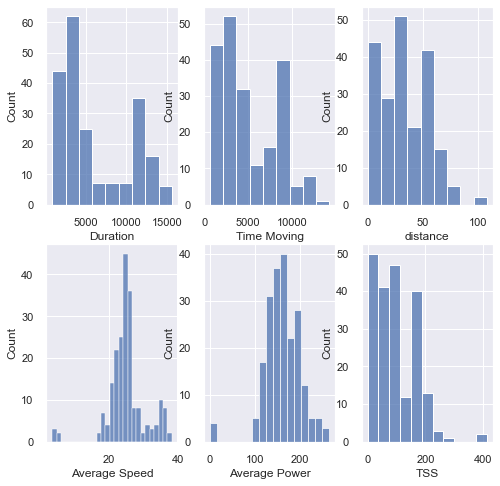

In [23]:
#plot multiple graphs 
sns.set_theme(style="darkgrid")
df = sns.load_dataset("penguins")
f, axes = plt.subplots(2, 3, figsize = (8, 8))
sns.histplot(result1['Duration'], ax=axes[0][0])
sns.histplot(result1['Time Moving'], ax=axes[0][1])
sns.histplot(result1['distance'], ax=axes[0][2])
sns.histplot(result1['Average Speed'], ax=axes[1][0])
sns.histplot(result1['Average Power'], ax=axes[1][1])
sns.histplot(result1['TSS'], ax=axes[1][2])
plt.show()

In [116]:
#Distance, Moving Time, Average Speed, Heart Rate, Power (watts), Normalised power (NP), Training Stress Score, Elevation Gain
col2 = ['SC_Date', 'distance', 'Time Moving', 'Average Speed', 'Average Heart Rate', 
        'average_watts', 'NP', 'TSS', 'elevation_gain']
result2 = strava_cheetah[col2]
result2

,SC_Date,distance,Time Moving,Average Speed,Average Heart Rate,average_watts,NP,TSS,elevation_gain
2018-01-27 19:39:49+00:00,2018-01-27,7.6,1053,26.0234,120.539,153.4,222.856,20.2257,95.00 m
2018-01-27 20:01:32+00:00,2018-01-27,38.6,4062,34.4380,146.541,187.7,245.365,94.5787,449.00 m
2018-02-05 21:06:42+00:00,2018-02-05,24.3,3945,22.2417,119.178,165.9,253.702,98.3269,439.00 m
2018-02-07 06:59:05+00:00,2018-02-07,47.1,8159,20.7841,124.936,151.0,232.644,171.0780,890.00 m
2018-02-09 19:18:03+00:00,2018-02-09,59.8,8415,25.6585,122.678,145.9,212.726,147.7970,656.00 m
...,...,...,...,...,...,...,...,...,...
2019-07-19 20:22:49+00:00,2019-07-19,58.2,8229,25.4524,0.000,166.8,222.988,159.3630,666.00 m
2019-07-26 20:12:56+00:00,2019-07-26,59.6,8410,25.5036,120.261,166.9,236.028,183.1140,663.00 m
2019-07-27 20:42:59+00:00,2019-07-27,19.8,2931,24.3316,121.697,168.4,212.020,51.1646,247.00 m
2019-07-27 21:47:24+00:00,2019-07-27,29.1,3015,34.8044,144.423,235.2,267.699,83.5620,415.00 m


In [127]:
result2.elevation_gain
#result2['elevation_gain'] = result2['elevation_gain'].astype('|S')
#result2['elevation_gain']
#ele_gain_str['elevation_gain'].dtypes

result2['ele_gain1']=result2['elevation_gain'].astype(str)
result2['ele_gain2'] = result2['ele_gain1'].str[:4]
result2['elevation_f'] = result2['ele_gain2'].astype(float)
#

#result2['elevation_gain']

#for i in range(0,len(result2)):
#  result2.iloc[i].elevation_gain = result2.iloc[i].elevation_gain[:1]
#result2.elevation_gain.unique()
drop_cols = ['elevation_gain', 'ele_gain1', 'ele_gain2']
result2.drop(drop_cols, axis = 1, inplace = True)
result2

<ipython-input-127-483688dcaf2d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result2['ele_gain1']=result2['elevation_gain'].astype(str)
<ipython-input-127-483688dcaf2d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result2['ele_gain2'] = result2['ele_gain1'].str[:4]
<ipython-input-127-483688dcaf2d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

,SC_Date,distance,Time Moving,Average Speed,Average Heart Rate,average_watts,NP,TSS,elevation_f
2018-01-27 19:39:49+00:00,2018-01-27,7.6,1053,26.0234,120.539,153.4,222.856,20.2257,95.0
2018-01-27 20:01:32+00:00,2018-01-27,38.6,4062,34.4380,146.541,187.7,245.365,94.5787,449.0
2018-02-05 21:06:42+00:00,2018-02-05,24.3,3945,22.2417,119.178,165.9,253.702,98.3269,439.0
2018-02-07 06:59:05+00:00,2018-02-07,47.1,8159,20.7841,124.936,151.0,232.644,171.0780,890.0
2018-02-09 19:18:03+00:00,2018-02-09,59.8,8415,25.6585,122.678,145.9,212.726,147.7970,656.0
...,...,...,...,...,...,...,...,...,...
2019-07-19 20:22:49+00:00,2019-07-19,58.2,8229,25.4524,0.000,166.8,222.988,159.3630,666.0
2019-07-26 20:12:56+00:00,2019-07-26,59.6,8410,25.5036,120.261,166.9,236.028,183.1140,663.0
2019-07-27 20:42:59+00:00,2019-07-27,19.8,2931,24.3316,121.697,168.4,212.020,51.1646,247.0
2019-07-27 21:47:24+00:00,2019-07-27,29.1,3015,34.8044,144.423,235.2,267.699,83.5620,415.0


In [118]:
#Check Correlation Note: value of 1 (or -1) The closer to 1 the better the relationship.
SC_corr=result2.corr()
SC_corr

#SC_corr = SC_corr[(SC_corr.distance >= 0.7) | (SC_corr['Time Moving'] <= -0.7)]
#SC_corr

,distance,Time Moving,Average Speed,Average Heart Rate,average_watts,NP,TSS,elevation_f
distance,1.000000,0.933596,0.187363,0.175241,0.031858,0.270703,0.922565,0.839543
Time Moving,0.933596,1.000000,-0.112951,0.039877,-0.114384,0.034142,0.866093,0.836633
Average Speed,0.187363,-0.112951,1.000000,0.422165,0.720608,0.674857,0.134054,0.011840
Average Heart Rate,0.175241,0.039877,0.422165,1.000000,0.404066,0.343179,0.183747,0.050808
average_watts,0.031858,-0.114384,0.720608,0.404066,1.000000,0.772574,0.150163,-0.096081
NP,0.270703,0.034142,0.674857,0.343179,0.772574,1.000000,0.432286,0.240465
TSS,0.922565,0.866093,0.134054,0.183747,0.150163,0.432286,1.000000,0.847247
elevation_f,0.839543,0.836633,0.011840,0.050808,-0.096081,0.240465,0.847247,1.000000


In [1]:
#SC_corr.corr().loc[:'distance', 'TSS':]

<AxesSubplot:xlabel='distance', ylabel='elevation_f'>

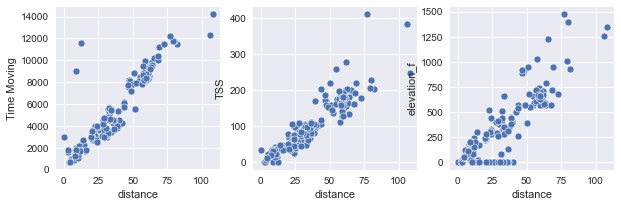

In [120]:
f, axes = plt.subplots(1, 3, figsize = (10, 3))
sns.scatterplot(x='distance', y = 'Time Moving', data = result2, ax=axes[0])
sns.scatterplot(x='distance', y = 'TSS', data = result2, ax=axes[1])
sns.scatterplot(x='distance', y = 'elevation_f', data = result2, ax=axes[2])

In [124]:
result2.elevation_gain.unique()

array(['95.00 m', '449.00 m', '439.00 m', '890.00 m', '656.00 m',
       '92.00 m', '387.00 m', '922.00 m', '191.00 m', '659.00 m',
       '244.00 m', '904.00 m', '195.00 m', '947.00 m', '242.00 m',
       '615.00 m', '222.00 m', '175.00 m', '279.00 m', '592.00 m',
       '582.00 m', '568.00 m', '119.00 m', '381.00 m', '593.00 m',
       '930.00 m', '889.00 m', '193.00 m', '627.00 m', '234.00 m',
       '130.00 m', '316.00 m', '410.00 m', '1342.00 m', '200.00 m',
       '0.00 m', '610.00 m', '646.00 m', '394.00 m', '662.00 m',
       '63.00 m', '503.00 m', '630.00 m', '679.00 m', '786.00 m',
       '740.00 m', '572.00 m', '710.00 m', '326.00 m', '586.60 m',
       '540.00 m', '680.00 m', '1394.00 m', '209.00 m', '513.00 m',
       '674.00 m', '251.00 m', '435.00 m', '330.00 m', '202.00 m',
       '923.00 m', '638.00 m', '1005.00 m', '575.00 m', '672.00 m',
       '24.00 m', '85.00 m', '695.00 m', '163.00 m', '422.00 m',
       '73.00 m', '441.00 m', '589.00 m', '1226.00 m', '949.00 m',

In [125]:
result2.elevation_f.unique()

array([  95.,  449.,  439.,  890.,  656.,   92.,  387.,  922.,  191.,
        659.,  244.,  904.,  195.,  947.,  242.,  615.,  222.,  175.,
        279.,  592.,  582.,  568.,  119.,  381.,  593.,  930.,  889.,
        193.,  627.,  234.,  130.,  316.,  410., 1342.,  200.,    0.,
        610.,  646.,  394.,  662.,   63.,  503.,  630.,  679.,  786.,
        740.,  572.,  710.,  326.,  586.,  540.,  680., 1394.,  209.,
        513.,  674.,  251.,  435.,  330.,  202.,  923.,  638., 1005.,
        575.,  672.,   24.,   85.,  695.,  163.,  422.,   73.,  441.,
        589., 1226.,  949.,  573.,  548.,  332.,  186.,  595.,   26.,
       1030.,  105.,  579.,  600.,  233.,  348.,  312.,  591.,   59.,
        414.,  585., 1474.,   52.,  437., 1255.,  520.,  235.,  425.,
        324.,  206.,  620.,  226.,  419.,  327.,  122.,  624.,  228.,
         88.,  307.,  199.,   41.,  347.,  259.,  626.,  443.,  717.,
        281.,  629.,   20.,  156.,  285.,  651.,   49.,  379.,  654.,
        671.,   79.,

In [99]:
test_col = ['Average Speed', 'Average Heart Rate']
HR_SP = result2[test_col]
HR_SP


,Average Speed,Average Heart Rate
2018-01-27 19:39:49+00:00,26.0234,120.539
2018-01-27 20:01:32+00:00,34.4380,146.541
2018-02-05 21:06:42+00:00,22.2417,119.178
2018-02-07 06:59:05+00:00,20.7841,124.936
2018-02-09 19:18:03+00:00,25.6585,122.678
...,...,...
2019-07-19 20:22:49+00:00,25.4524,0.000
2019-07-26 20:12:56+00:00,25.5036,120.261
2019-07-27 20:42:59+00:00,24.3316,121.697
2019-07-27 21:47:24+00:00,34.8044,144.423


In [24]:
#weather_data_2018.csv
weather2018 = pd.read_csv('data/weather_data_2018.csv', skipinitialspace=True)
weather2018

#weather2018['Date'] = weather2018['Year']....


,Product code,Bureau of Meteorology station number,Year,Month,Day,Maximum temperature (Degree C),Days of accumulation of maximum temperature,Quality
0,IDCJAC0010,66212,2018,1,1,30.9,1.0,Y
1,IDCJAC0010,66212,2018,1,2,28.8,1.0,Y
2,IDCJAC0010,66212,2018,1,3,25.3,1.0,Y
3,IDCJAC0010,66212,2018,1,4,25.4,1.0,Y
4,IDCJAC0010,66212,2018,1,5,28.9,1.0,Y
...,...,...,...,...,...,...,...,...
360,IDCJAC0010,66212,2018,12,27,33.8,1.0,Y
361,IDCJAC0010,66212,2018,12,28,35.3,1.0,Y
362,IDCJAC0010,66212,2018,12,29,35.9,1.0,Y
363,IDCJAC0010,66212,2018,12,30,36.4,1.0,Y


In [136]:
#type(weather2018.index)

#Check data type
weather2018.dtypes

Product code                                    object
Bureau of Meteorology station number             int64
Year                                             int64
Month                                            int64
Day                                              int64
Maximum temperature (Degree C)                 float64
Days of accumulation of maximum temperature    float64
Quality                                         object
dtype: object

In [221]:
weather2018.set_index(['Year', 'Month', 'Day'])

Product code  Bureau of Meteorology station number  \
Year Month Day                                                      
2018 1     1     IDCJAC0010                                 66212   
           2     IDCJAC0010                                 66212   
           3     IDCJAC0010                                 66212   
           4     IDCJAC0010                                 66212   
           5     IDCJAC0010                                 66212   
...                     ...                                   ...   
     12    27    IDCJAC0010                                 66212   
           28    IDCJAC0010                                 66212   
           29    IDCJAC0010                                 66212   
           30    IDCJAC0010                                 66212   
           31    IDCJAC0010                                 66212   

                Maximum temperature (Degree C)  \
Year Month Day                                   
2018 1     1                              30.9   
           2                              28.8   
           3                              25.3   
           4                              25.4   
           5                              28.9   
...                                        ...   
     12    27                             33.8   
           28                             35.3   
           29                             35.9   
           30                             36.4   
           31                             33.8   

                Days of accumulation of maximum temperature Quality  
Year Month Day                                                       
2018 1     1                                            1.0       Y  
           2                                            1.0       Y  
           3                                            1.0       Y  
           4                                            1.0       Y  
           5                                            1.0       Y  
...                                                     ...     ...  
     12    27                                           1.0       Y  
           28                                           1.0       Y  
           29                                           1.0       Y  
           30                                           1.0       Y  
           31                                           1.0       Y  

[365 rows x 5 columns]

In [217]:
#join

result_2018 = result_c.join(weather2018, how="inner")
result_2018


,average_heartrate,average_temp,average_watts,device_watts,distance,elapsed_time,elevation_gain,kudos,moving_time,workout_type,...,Month1,Day1,Product code,Bureau of Meteorology station number,Year,Month,Day,Maximum temperature (Degree C),Days of accumulation of maximum temperature,Quality


In [179]:
#weather_data_2018.csv
weather2019 = pd.read_csv('data/weather_data_2019.csv', skipinitialspace=True)
#weather2018.index = pd.to_datetime(weather2018['Year'] + '-' + weather2018['Month'] + '-' + weather2018['Day'])
weather2019.head()


#weather2018['new_date']=pd.to_datetime(weather2018['Year'])
weather2019['new_date']= (weather2019['Year'].apply(str) + '-' + weather2019['Month'].apply(str) + '-' +  weather2019['Day'].apply(str))
#weather2018['year']=weather2018['date'].dt.year
#weather2018['month']=weather2018['date'].dt.month
#weather2018['day']=weather2018['date'].dt.day

weather2019

,Product code,Bureau of Meteorology station number,Year,Month,Day,Maximum temperature (Degree C),Days of accumulation of maximum temperature,Quality,new_date
0,IDCJAC0010,66212,2019,1,1,34.0,1.0,Y,2019-1-1
1,IDCJAC0010,66212,2019,1,2,30.6,1.0,Y,2019-1-2
2,IDCJAC0010,66212,2019,1,3,28.9,1.0,Y,2019-1-3
3,IDCJAC0010,66212,2019,1,4,33.7,1.0,Y,2019-1-4
4,IDCJAC0010,66212,2019,1,5,39.3,1.0,Y,2019-1-5
...,...,...,...,...,...,...,...,...,...
360,IDCJAC0010,66212,2019,12,27,30.1,1.0,Y,2019-12-27
361,IDCJAC0010,66212,2019,12,28,33.8,1.0,Y,2019-12-28
362,IDCJAC0010,66212,2019,12,29,30.7,1.0,Y,2019-12-29
363,IDCJAC0010,66212,2019,12,30,33.2,1.0,Y,2019-12-30


## Required Analysis

1. Remove rides with no measured power (where device_watts is False) - these are commutes or MTB rides
* Look at the distributions of some key variables: time, distance, average speed, average power, TSS. Are they normally distributed? Skewed? 
* Explore the relationships between the following variables. Are any of them corrolated with each other (do they vary together in a predictable way)? Can you explain any relationships you observe?  
    * Distance
    * Moving Time
    * Average Speed
    * Heart Rate
    * Power (watts)
    * Normalised power (NP)
    * Training Stress Score
    * Elevation Gain
* We want to explore the differences between the three categories: `Race`, `Workout` and `Ride`.
    * Use scatter plots with different colours for each category to explore how these categories differ.  
    * Use histograms or box plots to visualise the different distributions of a variable for the three categories.
    * In both cases, experiment with different variables but only include those that are interesting in your final notebook (if none are interesting, show us a representative example).
* We want to explore relationship between `rides` and `weather`. In order to carry out this analysis, you need `weather` data from relevant source. For your convenience, we have downloaded temperature data from [Bureau of Meterology](http://www.bom.gov.au/). You can find temperature under `Maximum temperature (Degree C)` column which represents maximum temperature for the day. Under the `data` directory, you get `weather_data_2018.csv` and `weather_data_2019.csv` files from where you can read daily temperatures. In order to get temperature for a day so that you can use in your combined dataframe (joining Strava and Cheetah datasets), you need to make `date` column consistent in both dataframes. 
    * Make `date` column consistent across both `weather` and `rides` datasets so that you can get `Maximum temperature` for the day of the ride. 
    * Can you find any relationship between distance travelled per ride and the temperature?
    * Can you find any relatioship between Average speed of ride and the temperature?


## Challenge

* What leads to more `kudos`? Is there anything to indicate which rides are more popular? Explore the relationship between the main variables and kudos. Show a plot and comment on any relationship you observe. 

* Generate a plot that summarises the number of km ridden each month over the period of the data. Overlay this with the _sum_ of the Training Stress Score and the _average_ of the Average Speed to generate an overall summary of activity.

* Generate a similar graph but one that shows the activity over a given month, with the sum of the values for each day of the month shown.  So, if there are two rides on a given day, the graph should show the sum of the distances etc for these rides.

Hint: to generate these summary plots you need to use the [timeseries/date functionality](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html) in Pandas to generate a new data frame containing the required data.  

__Note:__ once you have completed these steps you can remove this cell.  Use the text as a starting point for the documentation of your workflow and discussion of results.
